In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [5]:
#  3. Convert the June temperatures to a list.
june_temp = []
june_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

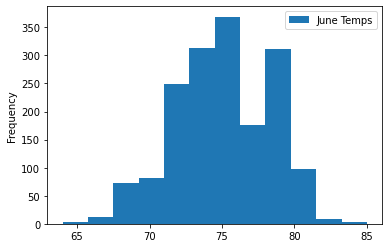

In [12]:
june_temp_df.plot.hist(bins=12)

In [14]:
# June precipitation summary statistics
june_precip = []
june_precip = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_precip_df = pd.DataFrame(june_precip, columns=['June Precipitation'])
june_precip_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [9]:
# 7. Convert the December temperatures to a list.
dec_temp = []
dec_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns=['December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

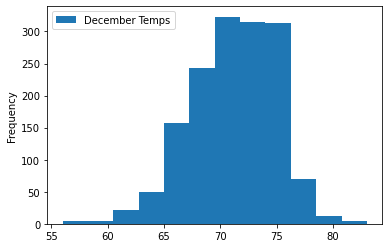

In [13]:
dec_temp_df.plot.hist(bins=12)

In [15]:
# December precipitation summary statistics
dec_precip = []
dec_precip = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_precip_df = pd.DataFrame(dec_precip, columns=['December Precipitation'])
dec_precip_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
